# Project: Investigate a Dataset - [No-show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#questions">Questions for Analysis</a></li> 
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This dataset collects information from 100k+ medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. The attributed data for each appointment include: 
<ul><li> Patient's Id, gender and age.
<li> The Neighbourhood in which the hospital is located.
<li> Whether the patient has some specific medical condition or not (e.g. diabetes).
<li> Whether the patient is enrolled in the Bolsa Familia program or not.
<li> Whether the patient received an SMS for the appointment or not.
</ul>

## <a id='questions'></a>Questions for Analysis
### <a href="#q1">Question 1</a>
What category of patients is most likely to miss an appointment?
### <a href="#q2">Question 2</a>
Does receiving an SMS increase the likelihood of a patient showing up?
### <a href="#q3">Question 3</a>
What age group misses the most appointments?
### <a href="#q4">Question 4</a>
Which neighbourhoods have the most/least attendance rate?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")

## <a id='wrangling'></a>Data Wrangling

In [2]:
file_path = 'Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv'
df = pd.read_csv(file_path)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
df.shape

(110527, 14)

In [4]:
df.PatientId.unique().shape[0]

62299

In [5]:
df.Neighbourhood.unique().shape[0]

81

## Data Cleaning

In [6]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

The whole No-show column convention is kinda confusing...

I will create a new column **'Attended'** with boolean values(True or False). In this column, a **No-show**'s (Yes) maps to **Attended**'s (False) and vice-versa.

In [7]:
df['No-show'].replace(['No','Yes'],[True,False], inplace=True) 
df.rename(columns = {'No-show' : 'Attended'},inplace=True)
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'Attended'],
      dtype='object')

In [8]:
df['Attended'].astype(bool)
df['Attended'].value_counts()

True     88208
False    22319
Name: Attended, dtype: int64

In [9]:
df['Scholarship'].replace([1,0],[True,False], inplace=True)
df['Scholarship'].astype(bool)
df['Scholarship'].value_counts()

False    99666
True     10861
Name: Scholarship, dtype: int64

In [10]:
df['SMS_received'].replace([1,0],[True,False], inplace=True)
df['SMS_received'].astype(bool)
df['SMS_received'].value_counts()

False    75045
True     35482
Name: SMS_received, dtype: int64

The data for **dates** can potentially be used in the analysis but they won't serve me answering the questions I'm basing my analysis on. 

What I'll do next is getting an idea about the time span of the data set. Afterwards, the date columns will be removed.

In [11]:
df['day'] = pd.to_datetime(df.AppointmentDay)
df['month'] = df['day'].dt.month
df.month.unique()

array([4, 5, 6])

In [12]:
df.query('month == 5').shape[0]/df.shape[0]

0.731414043627349

73% of the data is gathered over the span of a month, namely May of 2016, with the rest of the data during late April and early June.

In [13]:
#Removing date columns
df.drop(columns = ['ScheduledDay' , 'AppointmentDay', 'day' , 'month'], inplace=True)

In [14]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 12 columns):
PatientId        110527 non-null float64
AppointmentID    110527 non-null int64
Gender           110527 non-null object
Age              110527 non-null int64
Neighbourhood    110527 non-null object
Scholarship      110527 non-null bool
Hipertension     110527 non-null int64
Diabetes         110527 non-null int64
Alcoholism       110527 non-null int64
Handcap          110527 non-null int64
SMS_received     110527 non-null bool
Attended         110527 non-null bool
dtypes: bool(3), float64(1), int64(6), object(2)
memory usage: 7.9+ MB


In [15]:
df.duplicated().sum()

0

Looks like there is no missing values or duplicates. Great!

In [16]:
df.describe()

,PatientId,AppointmentID,Age,Hipertension,Diabetes,Alcoholism,Handcap
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.197246,0.071865,0.030400,0.022248
std,2.560949e+14,7.129575e+04,23.110205,0.397921,0.258265,0.171686,0.161543
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,4.000000


In [17]:
df.query('Handcap != 1').query('Handcap != 0').shape[0]

199

Wow! Someone's age is entered as -1 (which kinda makes me doubt the integrity of the whole dataset).

There is also 199 entries where handicap is neither 1 or 0 (goes up to 4).
I am going to assume that these other values represent a [True] and replace them with 1.

In the next steps I am going to remove the entry with age -1 and fix the consistency of the 'Handcap' column.


In [18]:
df.query('Age == -1')
# Locating the index of the weird age of -1 entry

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Attended
99832,4.659432e+14,5775010,F,-1,ROMÃO,False,0,0,0,0,False,True


In [19]:
df.drop([99832],axis = 0,inplace=True)
df.query('Age == -1') #checking

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Attended


In [20]:
df['Handcap'].replace([2, 3, 4], 0, inplace=True)
df.query('Handcap != 1').query('Handcap != 0').shape[0] #checking

0


## <a id='eda'></a>Exploratory Data Analysis


Let's see how many unique patients we have:

In [21]:
df.PatientId.nunique()

62298

In [22]:
unique_index = df[['PatientId']].drop_duplicates().index
df_unique = df.loc[unique_index]
df_unique.head(20)

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Attended
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,False,1,0,0,0,False,True
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,False,0,0,0,0,False,True
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,False,0,0,0,0,False,True
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,False,0,0,0,0,False,True
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,False,1,1,0,0,False,True
5,9.598513e+13,5626772,F,76,REPÚBLICA,False,1,0,0,0,False,True
6,7.336882e+14,5630279,F,23,GOIABEIRAS,False,0,0,0,0,False,False
7,3.449833e+12,5630575,F,39,GOIABEIRAS,False,0,0,0,0,False,False
8,5.639473e+13,5638447,F,21,ANDORINHAS,False,0,0,0,0,False,True
9,7.812456e+13,5629123,F,19,CONQUISTA,False,0,0,0,0,False,True


Let's quickly explore the proportions of genders - male and female.

In [23]:
data = df_unique.groupby('Gender').count()['AppointmentID']
data

Gender
F    40045
M    22253
Name: AppointmentID, dtype: int64

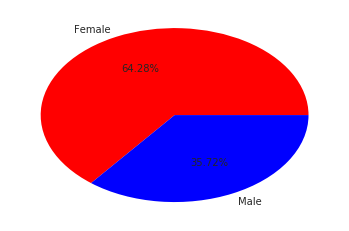

In [24]:
plt.pie(data.values, labels = ['Female', 'Male'], colors = ['r','b'], autopct='%.2f%%');

Now let's see the age distribution between genders

In [25]:
data_f = df_unique[df.Gender == 'F'].groupby('Age').count()['AppointmentID']
data_f.tail()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Age
98     3
99     1
100    2
102    2
115    2
Name: AppointmentID, dtype: int64

Not all ages are present which is gonna interfere when plotting the distribution. Let's fix this

In [26]:
ind = np.arange(116)
list_f = []
values_f = []
for age in ind:
    if age not in data_f.index:
        list_f.append(age)
        values_f.append(0)
data_f = data_f.append(pd.Series(values_f, index = list_f, dtype = int)).sort_index()
data_f.tail()

111    0
112    0
113    0
114    0
115    2
dtype: int64

Doing the same for males.

In [27]:
data_m = df_unique[df.Gender == 'M'].groupby('Age').count()['AppointmentID']
list_m = []
values_m = []
for age in ind:
    if age not in data_m.index:
        list_m.append(age)
        values_m.append(0)
data_m = data_m.append(pd.Series(values_m, index = list_m, dtype = int)).sort_index()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


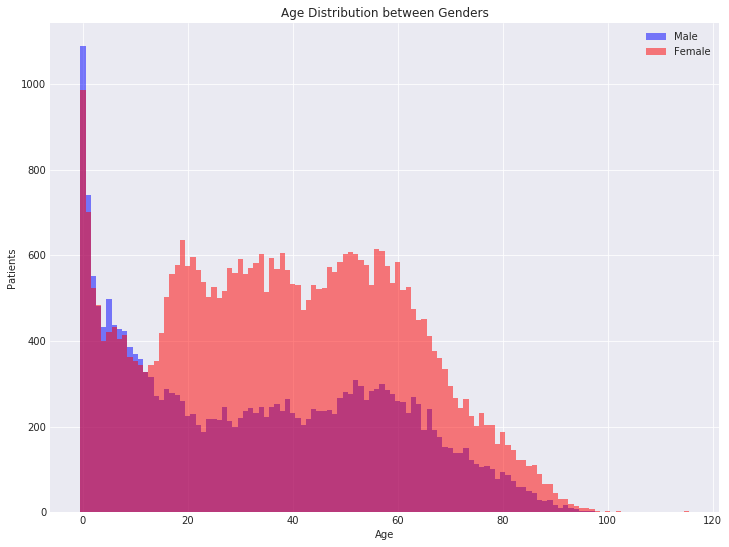

In [28]:
plt.figure(figsize=(12,9))
plt.bar(ind, data_m, width = 1, color = 'b', alpha = 0.5)
plt.bar(ind, data_f, width = 1, color = 'r', alpha = 0.5)
plt.legend(['Male', 'Female'])
plt.xlabel('Age')
plt.ylabel('Patients')
plt.title('Age Distribution between Genders');

### <a id='q1'></a>Research Question 1: What category of patients is most likely to miss an appointment?

In [29]:
def condition_stats(df, condition):
    """"
    Takes the DataFrame along with a specific condition as arguments.
    Returns a Pandas Series with Stats about the numbers of attended and missed appointments.
    """
    counts = df[df[condition] == 1]['Attended'].value_counts()
    number_attended = counts[True]
    number_missed = counts[False]
    percentage = counts[True]/counts.sum()
    total = counts.sum()
    data = [total, number_attended, number_missed, percentage]
    _index = ['Count', 'Attended', 'Missed', 'Attending Percentage']
    _series = pd.Series(data, index = _index)
    
    return _series

In [30]:
condition_stats(df, 'Hipertension')

Count                   21801.00000
Attended                18029.00000
Missed                   3772.00000
Attending Percentage        0.82698
dtype: float64

In [31]:
condition_stats(df, 'Diabetes')

Count                   7943.000000
Attended                6513.000000
Missed                  1430.000000
Attending Percentage       0.819967
dtype: float64

In [32]:
condition_stats(df, 'Alcoholism')

Count                   3360.000000
Attended                2683.000000
Missed                   677.000000
Attending Percentage       0.798512
dtype: float64

In [33]:
condition_stats(df, 'Handcap')

Count                   2042.000000
Attended                1676.000000
Missed                   366.000000
Attending Percentage       0.820764
dtype: float64

In [34]:
conditions = ['Hipertension','Diabetes','Alcoholism','Handcap']
conditions_percent = []
conditions_attended = [] 
conditions_missed = [] #creating the height arguments for bar charts

for condition in conditions:
    conditions_attended.append(int(condition_stats(df,condition)['Attended']))
    conditions_missed.append(int(condition_stats(df,condition)['Missed']))
    conditions_percent.append(condition_stats(df,condition)['Attending Percentage'])

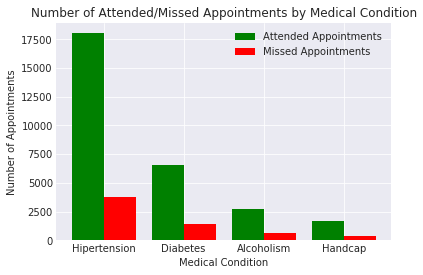

In [35]:
ind = np.arange(4)
width = 0.4
plt.bar(ind, conditions_attended, width, color = 'g', label = 'Attended Appointments')
plt.bar(ind + width, conditions_missed, width, color = 'r', label = 'Missed Appointments', tick_label = conditions)
plt.title('Number of Attended/Missed Appointments by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Number of Appointments')
locations = ind + width / 2  # xtick locations
plt.xticks(locations, conditions)
plt.legend();

It seems like the most common medical condition of those mentioned in our dataset is Hypertension (21801 appointments of which 18029 attended).

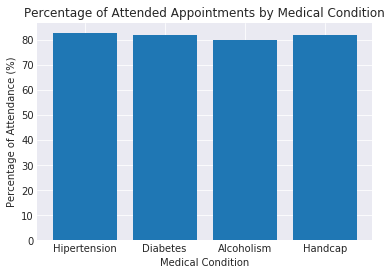

In [36]:
locations = [1,2,3,4]
heights = [i * 100 for i in conditions_percent]
labels = conditions
plt.title('Percentage of Attended Appointments by Medical Condition')
plt.xlabel('Medical Condition')
plt.ylabel('Percentage of Attendance (%)')
plt.bar(locations,heights,tick_label = labels);

From what I am observing, having a specific medical condition does not affect the likelihood of showing up to a medical appointment. Alcoholism, however is slightly lower in percentage than the other mentioned conditions. 

### <a id='q2'></a>Research Question 2: Does receiving an SMS increase the likelihood of a patient showing up?

In [37]:
sms_received = df.query('SMS_received == True')['Attended'].value_counts()
sms_not_received = df.query('SMS_received == False')['Attended'].value_counts()

In [38]:
sms_percent = sms_received[True]/sms_received.sum()
no_sms_percent = sms_not_received[True]/sms_not_received.sum()

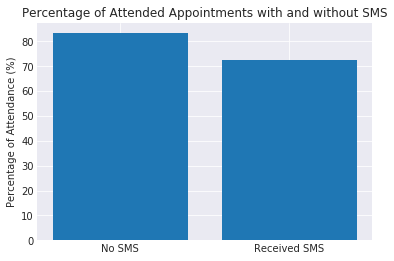

In [39]:
locations = [1,2]
heights = [no_sms_percent*100, sms_percent*100]
labels = ['No SMS', 'Received SMS']
plt.title('Percentage of Attended Appointments with and without SMS')
plt.ylabel('Percentage of Attendance (%)')
plt.bar(locations,heights,tick_label = labels);

Looks like patients who received an SMS are **LESS** likely to attend the appointment.
This is a strange finding but we shall not draw any conclusions of causation from it. Maybe further investigation can reveal the reason why.

### <a id='q3'></a>Research Question 3: What age group misses the most appointments?

In [40]:
list_separators = df.Age.describe()['min':'max'].tolist()
list_ranges = ['<19', '19 to 37', '38 to 55', '>55']
df['AgeGroup'] = pd.cut(df['Age'],list_separators, labels = list_ranges)
df.head()

,PatientId,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,Attended,AgeGroup
0,2.987250e+13,5642903,F,62,JARDIM DA PENHA,False,1,0,0,0,False,True,>55
1,5.589978e+14,5642503,M,56,JARDIM DA PENHA,False,0,0,0,0,False,True,>55
2,4.262962e+12,5642549,F,62,MATA DA PRAIA,False,0,0,0,0,False,True,>55
3,8.679512e+11,5642828,F,8,PONTAL DE CAMBURI,False,0,0,0,0,False,True,<19
4,8.841186e+12,5642494,F,56,JARDIM DA PENHA,False,1,1,0,0,False,True,>55


In [41]:
age_group_counts = df.groupby(['AgeGroup','Attended']).count()['Age']
age_group_counts

AgeGroup  Attended
<19       False        5708
          True        19619
19 to 37  False        6414
          True        20836
38 to 55  False        5255
          True        21651
>55       False        4303
          True        23201
Name: Age, dtype: int64

In [42]:
age_group_totals = df.groupby(['AgeGroup']).count()['Age']
age_group_totals

AgeGroup
<19         25327
19 to 37    27250
38 to 55    26906
>55         27504
Name: Age, dtype: int64

In [43]:
age_group_proportion = age_group_counts[:,True]/age_group_totals
age_group_proportion

AgeGroup
<19         0.774628
19 to 37    0.764624
38 to 55    0.804690
>55         0.843550
Name: Age, dtype: float64

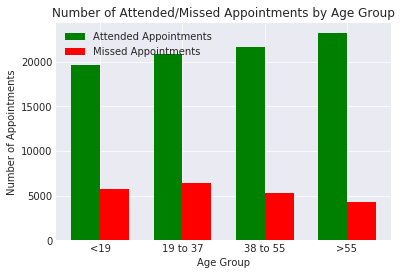

In [44]:
ind = np.arange(4)
width = 0.35
plt.bar(ind, age_group_counts[:,True].values, width, color = 'g', label = 'Attended Appointments')
plt.bar(ind + width, age_group_counts[:,False].values, width, color = 'r', label = 'Missed Appointments')
plt.title('Number of Attended/Missed Appointments by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Appointments')
locations = ind + width / 2  # xtick locations
plt.xticks(locations, age_group_totals.index)
plt.legend();

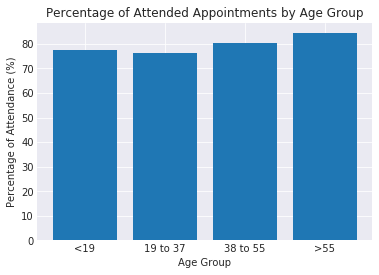

In [45]:
locations = [1,2,3,4]
heights = (age_group_proportion*100).values
labels = age_group_totals.index
plt.title('Percentage of Attended Appointments by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Percentage of Attendance (%)')
plt.bar(locations,heights,tick_label = labels);

The older we get, the less likely we are to miss our doctor appointments.

### <a id='q4'></a>Research Question 4: Which neighbourhoods have the most/least attendance rate?

Since I am going to study the **percentages** of attendance for each neighbourhood, it is appropriate to only consider the neighboorhoods with relevant amount of entries, which I chose to be a minimum of 500 entries in the given dataset. Any neighbourhoods with less than 500 entries will be filtered out only for the purposes of the current exploration.

In [46]:
relevant_neighbourhoods = df.groupby('Neighbourhood').count().query('AppointmentID > 500')
list_relevant_neighbourhoods = relevant_neighbourhoods.index.tolist()
len(list_relevant_neighbourhoods)

54

There is 54 neighbourhoods out of 81 that have more than 500 entries in our dataset.

In [47]:
df_neighbourhoods = df.query('Neighbourhood == @list_relevant_neighbourhoods')
df_neighbourhoods.shape[0]/df.shape[0] 

0.9419050721097298

The neighbourhoods with more than 500 entries cover more than 94% of our dataset, which is a good represantation of the sample.

In [48]:
neighbourhood_attendance_counts = df_neighbourhoods.groupby(['Neighbourhood','Attended']).count()['Age']
neighbourhood_attendance_counts

Neighbourhood   Attended
ANDORINHAS      False        521
                True        1741
BELA VISTA      False        384
                True        1523
BENTO FERREIRA  False        193
                True         665
BONFIM          False        550
                True        2223
CARATOÍRA       False        591
                True        1974
CENTRO          False        703
                True        2631
CONQUISTA       False        160
                True         689
CONSOLAÇÃO      False        237
                True        1139
CRUZAMENTO      False        304
                True        1094
DA PENHA        False        429
                True        1788
DO CABRAL       False         88
                True         472
DO QUADRO       False        140
                True         709
ESTRELINHA      False        106
                True         432
FONTE GRANDE    False        149
                True         533
FORTE SÃO JOÃO  False        346
                Tr

In [49]:
neighbourhood_attendance_totals = df_neighbourhoods.groupby(['Neighbourhood']).count()['Age']
neighbourhood_attendance_proportions = neighbourhood_attendance_counts[:,True]/neighbourhood_attendance_totals
neighbourhood_attendance_proportions.sort_values(ascending=False, inplace=True)
neighbourhood_attendance_proportions

Neighbourhood
DO CABRAL              0.842857
SANTA MARTHA           0.841584
JARDIM DA PENHA        0.837245
DO QUADRO              0.835100
VILA RUBIM             0.834313
MATA DA PRAIA          0.829193
REPÚBLICA              0.828743
CONSOLAÇÃO             0.827762
SANTO ANTÔNIO          0.823744
REDENÇÃO               0.822923
NOVA PALESTINA         0.822438
JABOUR                 0.820247
JOANA D´ARC            0.819201
TABUAZEIRO             0.817050
FORTE SÃO JOÃO         0.816834
PRAIA DO CANTO         0.816425
CONQUISTA              0.811543
JARDIM CAMBURI         0.810159
INHANGUETÁ             0.808893
ILHA DE SANTA MARIA    0.808488
JUCUTUQUARA            0.808357
DA PENHA               0.806495
GOIABEIRAS             0.804286
ESTRELINHA             0.802974
SANTO ANDRÉ            0.802412
SÃO CRISTÓVÃO          0.802288
BONFIM                 0.801659
SÃO BENEDITO           0.800556
BELA VISTA             0.798637
MONTE BELO             0.798544
GRANDE VITÓRIA         0.7

In [50]:
most_attended_neighbourhoods = neighbourhood_attendance_proportions.head(5)
most_attended_neighbourhoods

Neighbourhood
DO CABRAL          0.842857
SANTA MARTHA       0.841584
JARDIM DA PENHA    0.837245
DO QUADRO          0.835100
VILA RUBIM         0.834313
Name: Age, dtype: float64

In [51]:
least_attended_neighbourhoods = neighbourhood_attendance_proportions.tail(5)
least_attended_neighbourhoods

Neighbourhood
ILHA DO PRÍNCIPE     0.765225
JESUS DE NAZARETH    0.756046
ITARARÉ              0.737336
SANTA CLARA          0.735178
SANTOS DUMONT        0.710815
Name: Age, dtype: float64

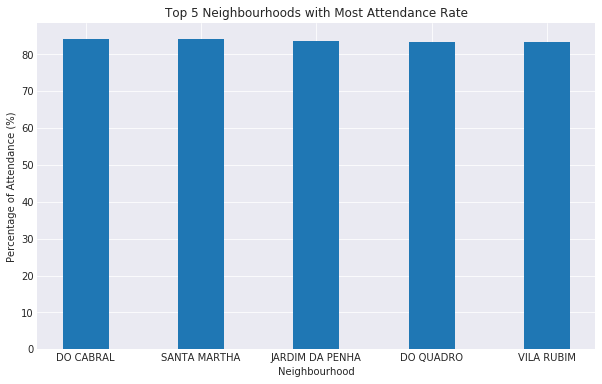

In [52]:
locations = np.arange(5)*2
heights = (most_attended_neighbourhoods*100).values
labels = most_attended_neighbourhoods.index
plt.figure(figsize=(10, 6))
plt.title('Top 5 Neighbourhoods with Most Attendance Rate')
plt.xlabel('Neighbourhood')
plt.ylabel('Percentage of Attendance (%)')
plt.bar(locations,heights,tick_label = labels);

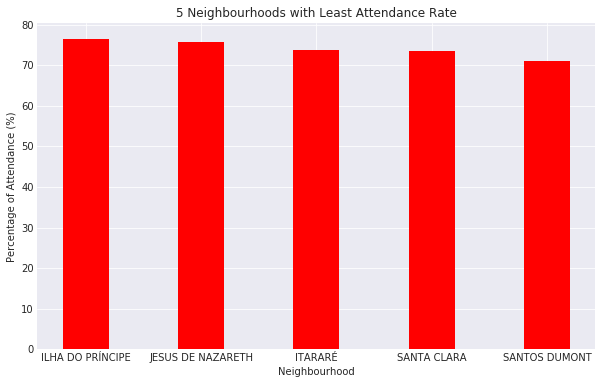

In [53]:
locations = np.arange(5)*2
heights = (least_attended_neighbourhoods*100).values
labels = least_attended_neighbourhoods.index
plt.figure(figsize=(10, 6))
plt.title('5 Neighbourhoods with Least Attendance Rate')
plt.xlabel('Neighbourhood')
plt.ylabel('Percentage of Attendance (%)')
plt.bar(locations,heights,tick_label = labels, color = 'r');

A different approach for evaluating the attendance by neighbourhood is checking for the 10 largest ones. It is evident that we do not have data for the population or area of each neighbourhood but we can make an educated guess that the neighbours with the most entries are probably the largest/most populated.

In [54]:
#getting a list of the 10 neighboorhoods (out of 81) with the most entries 
top10_neighbourhoods = df.groupby('Neighbourhood').count().sort_values('Attended',ascending=False).head(10)['Attended']
top10_neighbourhoods

Neighbourhood
JARDIM CAMBURI       7717
MARIA ORTIZ          5805
RESISTÊNCIA          4431
JARDIM DA PENHA      3877
ITARARÉ              3514
CENTRO               3334
TABUAZEIRO           3132
SANTA MARTHA         3131
JESUS DE NAZARETH    2853
BONFIM               2773
Name: Attended, dtype: int64

In [55]:
list_top10_neighbourhoods = top10_neighbourhoods.index.tolist()
df_top10 = df.query('Neighbourhood == @list_top10_neighbourhoods')
df_top10.shape[0]/df.shape[0] 

0.3670358105785064

We now know the top 10 neighboorhoods cover around 37% of the total entries

In [56]:
attended = df_top10.groupby(['Neighbourhood','Attended']).count()['Age']
attended_percent = (attended[:,True]/top10_neighbourhoods).reindex(list_top10_neighbourhoods)
attended_percent

Neighbourhood
JARDIM CAMBURI       0.810159
MARIA ORTIZ          0.790009
RESISTÊNCIA          0.795531
JARDIM DA PENHA      0.837245
ITARARÉ              0.737336
CENTRO               0.789142
TABUAZEIRO           0.817050
SANTA MARTHA         0.841584
JESUS DE NAZARETH    0.756046
BONFIM               0.801659
dtype: float64

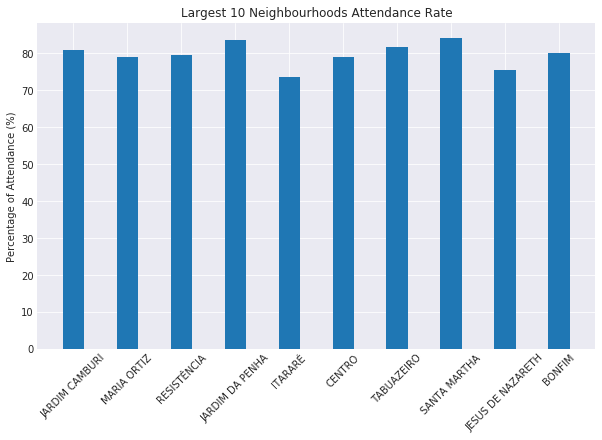

In [57]:
locations = np.arange(10)*2
heights = (attended_percent*100).values
labels = attended_percent.index
plt.figure(figsize=(10, 6))
plt.title('Largest 10 Neighbourhoods Attendance Rate')
plt.ylabel('Percentage of Attendance (%)')
plt.bar(locations,heights,tick_label = labels)
plt.xticks(rotation = 45);

<a id='conclusions'></a>
## Conclusions
It is observed from our plots and findings that the results are all centered around the 80% mark, meaning around 80% of each of the categories studied attend their medical appointments. I can draw the following conclusions from my analysis:
<ul>
    <li> Hypertension is a serious and common medical condition in Brazil. Having a specific medical condition however does not increase nor decrease the likelihood of showing up to a medical appointment. (Alcoholics still scored badly though).
    <li> Patients older than 55 years are the most likely to attend their medical appointments.
    <li> Patients who received an SMS strangely were less likely to attend their appointments. This definitely needs further analysis to figure out why.    
    <li> Within the 10 largest neighbourhoods, we find that two with the least attendance rates(JESUS DE NAZARETH & ITARARÉ), along with two with the most attendance rates(JARDIM DA PENHA & SANTA MARTHA) also appear in our Top 5 and Bottom 5 lists of attendance rate. This solidifies my confidence in the findings as there seems to be no correlation between neighbourhood population and their rates of attendance.
    
</ul>



### Limitations
One of the limitations in the dataset is the very brief timespan over which the data was gathered. The span is less than 2 month in a single year. There is no way of seeing trends in attendance rate over the years or even study which seasons have the most appointments in them.


In [60]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0